(ttest-exercises-notebook)=
# Esercizi sul t di Student

In [45]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as st 

In [2]:
# Initialize random number generator
RANDOM_SEED = 8927
rng = np.random.default_rng(RANDOM_SEED)

plt.style.use("bmh")
plt.rcParams["figure.figsize"] = [10, 6]
plt.rcParams["figure.dpi"] = 100
plt.rcParams["figure.facecolor"] = "white"

sns.set_theme(palette="colorblind")

%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%config InlineBackend.figure_format = "svg"

È stato condotto uno studio di ricerca per esaminare le differenze tra gli adulti più anziani e quelli più giovani sulla percezione della soddisfazione nella vita. È stato condotto uno studio pilota per testare questa ipotesi. Dieci adulti più anziani (oltre i 70 anni) e dieci adulti più giovani (tra i 20 e i 30 anni) hanno svolto un test di soddisfazione nella vita (noto per avere un'elevata affidabilità e validità). I punteggi sulla misura vanno da 0 a 60, con punteggi elevati indicativi di una elevata soddisfazione nella vita e punteggi bassi indicativi di una bassa soddisfazione nella vita. I dati sono presentati di seguito. 

In [93]:
younger = np.array([45, 38, 52, 48, 25, 39, 51, 46, 55, 46])
older = np.array([34, 33, 36, 38, 37, 40, 42, 43, 32, 36])


Consideriamo soltanto il gruppo degli adulti più anziani. Si suppponga che studi precedenti indichino che, per questo gruppo d'età, la soddisfazione della vita misurata con questo test sia pari a 60. Si svolga il test t di Student usando l'ipotesi nulla che nella popolazione la media sia effettivamente uguale a 40.

Inziamo a svolgere il test t di Student con la funzione `ttest_1samp` de modulo `scipy.stats`. Poniamo la media dell'ipotesi nulla a 40.

In [94]:
t_statistic, p_value = st.ttest_1samp(older, 40)

Esaminiamo il risultato.

In [95]:
print(f"t-statistic = {t_statistic}, p-value = {p_value}")

t-statistic = -2.481665888425312, p-value = 0.03489593108658913


Svolgiamo ora i calcoli applicando la formula del test t di Student.

$$
T = \frac{\bar{Y} - \mathbb{E}(Y)}{s / \sqrt{n}}
$$

In [96]:
T = (np.mean(older) - 40) / (np.std(older, ddof=1) / np.sqrt(len(older)))
T

-2.481665888425312

I gradi di libertà sono pari a $n-1$. 

In [99]:
df = len(older) - 1
print(df)

9


Troviamo il valore-p, ovvero l'area sottesa alla distribuzione t di Student con 9 gradi di libertà nei due intervalli $[-\infty, -T]$ e $[T, +\infty]$.

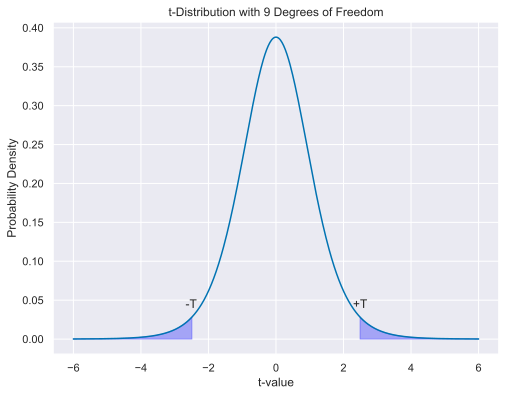

In [112]:
# Set the degrees of freedom and T-value
df = 9
T = 2.48

# Generate x-values for the t-distribution plot
x = np.linspace(-6, 6, num=500)

# Generate y-values for the t-distribution plot
y = t.pdf(x, df)

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(8,6))

# Plot the t-distribution
ax.plot(x, y)

# Shade the areas outside of the critical values
ax.fill_between(x[x <= -T], y[x <= -T], 0, alpha=0.3, color='blue')
ax.fill_between(x[x >= T], y[x >= T], 0, alpha=0.3, color='blue')

# Remove the shading for the central region
ax.fill_between(x[(x >= -T) & (x <= T)], y[(x >= -T) & (x <= T)], 0, alpha=0)

# Add text labels for the critical values
ax.text(-T - 0.2, 0.04, '-T', fontsize=12)
ax.text(T - 0.2, 0.04, '+T', fontsize=12)

# Set the title and axis labels
ax.set_title(f't-Distribution with {df} Degrees of Freedom')
ax.set_xlabel('t-value')
ax.set_ylabel('Probability Density')

# Show the plot
plt.show()

In [98]:
st.t.cdf(T, df=len(older)-1) * 2

0.03489593108658913

La distriuzione camionaria delle medie di ampiezza $n$ = 10 ha media $\mu_{\bar{X}} = \mu$ e varianza $\sigma^2_{\bar{X}} = \frac{\sigma^2}{n}$, dove $\mu$ è la media della popolazione e $\sigma^2$ è la varianza della popolazione. Il test t di Student presuppone che il campione casuale sia stato estratto da una popolazione normale.

La formula usata dal test t di Student può essere intesa come la standardizzazione della media del campione nella distribuzione campionaria delle medie di ampiezza $n$.

Poiché i parametri della popolazione sono sconosciuti, l'approccio frequentista utilizza la media ipotizzata da $H_0$ al posto della media sconosciuta della popolazione e stima il parametro sconosciuto $\sigma^2$ con la deviazione standard $s$ del campione. 

È stato dimostrato che la statistica 

$$
T = \frac{\bar{Y} - \mathbb{E}(Y)}{s / \sqrt{n}}
$$

segue la distribuzione $t$ di Student con $n-1$ gradi di libertà. 

È importante notare che la statistica $T$ è simile alla statistica $Z$

$$
Z = \frac{\bar{Y} - \mathbb{E}(Y)}{\sigma / \sqrt{n}}
$$

che è la standardizzazione della media campionaria nell'universo delle medie di campioni di ampiezza $n$ quando si conosce il parametro $\sigma$. Tuttavia, la statistica $T$ viene utilizzata quando si stima $\sigma$ utilizzando la deviazione standard del campione $s$.

## Watermark

In [39]:
%load_ext watermark
%watermark -n -u -v -iv 

Last updated: Sat May 06 2023

Python implementation: CPython
Python version       : 3.11.3
IPython version      : 8.13.2

scipy      : 1.10.1
seaborn    : 0.12.2
matplotlib : 3.7.1
arviz      : 0.15.1
numpy      : 1.23.5
statsmodels: 0.14.0
xarray     : 2023.4.2
pandas     : 1.5.3

